In [1]:
import numpy as np
from scipy import ndimage as ndi
from skimage import morphology
from quanfima import simulation
from quanfima import morphology as mrph
from quanfima import utils
from quanfima import visualization as vis

In [5]:
import matplotlib.pyplot as plt 

In [ ]:
result = simulation.simulate_fibers((128,128,128), 
                                    n_fibers=30, 
                                    max_fails=200,
                                    radius_lim=(3, 5), 
                                    gap_lim=(10,20))

In [ ]:
# unpacking result
volume = result[0]
lat_ref = result[1]
azth_ref = result[2]
diameter = result[3]
n_generated = result[4]
elapsed_time = result[5]

In [25]:
n_generated

30

In [13]:
volume = volume.astype(np.uint8)

In [22]:
volume.shape

(128, 128, 128)

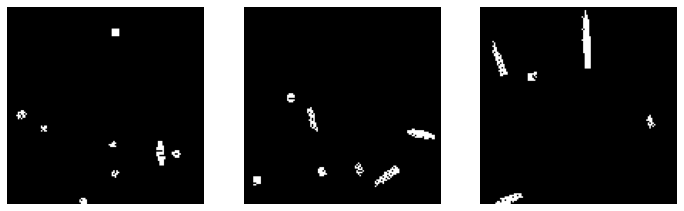

In [21]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
for i in range(volume.ndim): 
    sl = np.take(volume, volume.shape[i]//2, i)
    axs[i].imshow(sl, cmap = 'gray')
    axs[i].axis('off')

In [23]:
volume = ndi.binary_fill_holes(volume)
volume = ndi.median_filter(volume, footprint=morphology.ball(2))

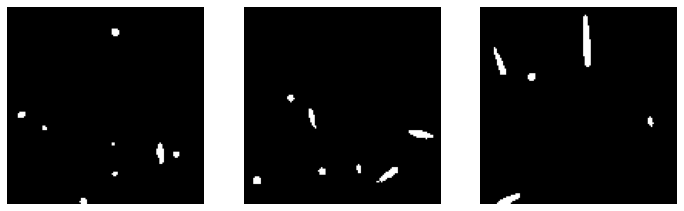

In [24]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
for i in range(volume.ndim): 
    sl = np.take(volume, volume.shape[i]//2, i)
    axs[i].imshow(sl, cmap = 'gray')
    axs[i].axis('off')

In [ ]:
lat_ref = ndi.median_filter(lat_ref, footprint=morphology.ball(2))
azth_ref = ndi.median_filter(azth_ref, footprint=morphology.ball(2))


In [ ]:
# prepare data and analyze fibers
pdata, pskel, pskel_thick = utils.prepare_data(volume)


In [ ]:
#oprops =  mrph.estimate_tensor_parallel('dataset_orientation_w36',
#										pskel, pskel_thick, 36,
#										'../../data/results')
oprops =  mrph.estimate_tensor_parallel('dataset_orientation_w36',
										pskel, pskel_thick, 36,
										'data/results')



In [ ]:
odata = np.load(oprops['output_path'], allow_pickle=True).item()
lat, azth, skel = odata['lat'], odata['azth'], odata['skeleton']



In [ ]:
dprops = mrph.estimate_diameter_single_run('dataset_diameter',
										   'data/results',
										   pdata, skel, lat, azth)
#dmtr = np.load(dprops['output_path']).item()['diameter']

In [ ]:
# plot results
vis.plot_3d_orientation_map('dataset_w36', lat, azth,
							output_dir='data/results',
							camera_azth=40.47,
							camera_elev=32.5,
							camera_fov=35.0,
							camera_loc=(40.85, 46.32, 28.85),
							camera_zoom=0.005124)

#vis.plot_3d_diameter_map('dataset_w36', dmtr,
#						 output_dir='/data/results',
#						 measure_quantity='vox',
#						 camera_azth=40.47,
#						 camera_elev=32.5,
#						 camera_fov=35.0,
#						 camera_loc=(40.85, 46.32, 28.85),
#						 camera_zoom=0.005124,
#						 cb_x_offset=5,
#						 width=620)